In [55]:
import pandas as pd

In [56]:
df=pd.read_csv("covid_19_data.csv")

In [57]:
df

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7
...,...,...,...,...,...,...
316,4/29/2020,Wyoming,US,545,7,0
317,4/29/2020,Xinjiang,Mainland China,76,3,73
318,4/29/2020,Yukon,Canada,11,0,0
319,4/29/2020,Yunnan,Mainland China,185,2,181


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321 entries, 0 to 320
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       321 non-null    object
 1   State      140 non-null    object
 2   Region     321 non-null    object
 3   Confirmed  321 non-null    int64 
 4   Deaths     321 non-null    int64 
 5   Recovered  321 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 15.2+ KB


In [59]:
df.isnull().sum()

Date           0
State        181
Region         0
Confirmed      0
Deaths         0
Recovered      0
dtype: int64

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

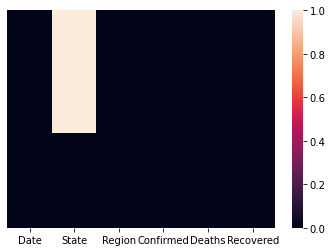

In [61]:
sns.heatmap(df.isnull(),yticklabels=False)

### Q1 Show the number of confirmed death and recovered case in each region

In [62]:
df.head()

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7


In [63]:
df.groupby("Region").sum()

,Confirmed,Deaths,Recovered
Region,,,
Afghanistan,1939,60,252
Albania,766,30,455
Algeria,3848,444,1702
Andorra,743,42,423
Angola,27,2,7
...,...,...,...
West Bank and Gaza,344,2,71
Western Sahara,6,0,5
Yemen,6,0,1


In [64]:
df.groupby("Region").Confirmed.sum().sort_values()

Region
Yemen                          6
Western Sahara                 6
Bhutan                         7
Papua New Guinea               8
Sao Tome and Principe          8
                          ...   
UK                        166441
France                    166543
Italy                     203591
Spain                     236899
US                       1039909
Name: Confirmed, Length: 187, dtype: int64

In [65]:
df.groupby("Region").Deaths.sum().sort_values()

Region
Laos              0
Mongolia          0
Mozambique        0
Cambodia          0
Fiji              0
              ...  
France        24121
Spain         24275
UK            26166
Italy         27682
US            60967
Name: Deaths, Length: 187, dtype: int64

In [66]:
df.groupby("Region").Recovered.sum().sort_values(ascending=False)

Region
Spain               132929
US                  120720
Germany             120400
Mainland China       77610
Iran                 73791
                     ...  
Cabo Verde               2
Yemen                    1
South Sudan              0
Papua New Guinea         0
MS Zaandam               0
Name: Recovered, Length: 187, dtype: int64

### Q2 Remove all the records where confirmed cases is less than ten

In [67]:
data=df[~df["Confirmed"]<10]
data.head()

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7


### Q3 In which region maximum number of cases were confirmed 

In [83]:
df.groupby("Region").Confirmed.sum().sort_values(ascending=False).head(1)

Region
US    1039909
Name: Confirmed, dtype: int64

### Q4 In which region minimum number of deaths cases were recorded?

In [86]:
df.groupby("Region").Deaths.sum().sort_values().head(1)

Region
Laos    0
Name: Deaths, dtype: int64

### Q5 How many confirmed deaths & recovered cases were reported from india till 29 april 2020

In [93]:
df[df.Region=="India"]

,Date,State,Region,Confirmed,Deaths,Recovered
74,4/29/2020,NaN,India,33062,1079,8437


### Q6 sort the entire data wrt no. of confirmed cases in ascending order 

In [96]:
df.sort_values("Confirmed")

,Date,State,Region,Confirmed,Deaths,Recovered
285,4/29/2020,Recovered,US,0,0,120720
284,4/29/2020,Recovered,Canada,0,0,20327
203,4/29/2020,Diamond Princess cruise ship,Canada,0,1,0
305,4/29/2020,Tibet,Mainland China,1,0,1
289,4/29/2020,Saint Pierre and Miquelon,France,1,0,0
...,...,...,...,...,...,...
57,4/29/2020,NaN,France,165093,24087,48228
168,4/29/2020,NaN,UK,165221,26097,0
80,4/29/2020,NaN,Italy,203591,27682,71252
153,4/29/2020,NaN,Spain,236899,24275,132929


In [97]:
df.sort_values("Confirmed",ascending=False)

,Date,State,Region,Confirmed,Deaths,Recovered
265,4/29/2020,New York,US,299691,23477,0
153,4/29/2020,NaN,Spain,236899,24275,132929
80,4/29/2020,NaN,Italy,203591,27682,71252
168,4/29/2020,NaN,UK,165221,26097,0
57,4/29/2020,NaN,France,165093,24087,48228
...,...,...,...,...,...,...
305,4/29/2020,Tibet,Mainland China,1,0,1
289,4/29/2020,Saint Pierre and Miquelon,France,1,0,0
285,4/29/2020,Recovered,US,0,0,120720
284,4/29/2020,Recovered,Canada,0,0,20327
